In [1]:
import pandas as pd
import numpy as np

from shapely.wkt import loads as wkt_loads
from shapely import affinity
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2

In [2]:
import tifffile as tiff


In [3]:
csv = 'train_wkt_v4.csv'
annotations = pd.read_csv(csv)
is_building = annotations['ClassType']==1
building_only = annotations[is_building]
is_building_not_empty =  building_only['MultipolygonWKT']!='MULTIPOLYGON EMPTY'
buildings = building_only[is_building_not_empty]

In [4]:
buildings

,ImageId,ClassType,MultipolygonWKT
10,6120_2_2,1,MULTIPOLYGON (((0.000439 -0.009039999999999999...
20,6120_2_0,1,"MULTIPOLYGON (((0.005324 -0.002879, 0.005327 -..."
60,6100_1_3,1,"MULTIPOLYGON (((0.000748 -0.009042, 0.000745 -..."
80,6110_4_0,1,"MULTIPOLYGON (((0.007546 -0.005158, 0.007584 -..."
90,6140_3_1,1,MULTIPOLYGON (((0.0041385419488102 -0.00889310...
100,6110_1_2,1,MULTIPOLYGON (((5.99993550571e-05 -0.009031902...
110,6100_2_3,1,MULTIPOLYGON (((0.008963998153499299 -0.009041...
140,6140_1_2,1,MULTIPOLYGON (((0.000102 -0.009039999999999999...
150,6110_3_1,1,MULTIPOLYGON (((0.0040671780447186 -0.00889538...
200,6060_2_3,1,"MULTIPOLYGON (((0.006565 -0.008494, 0.006652 -..."


In [5]:
gs = pd.read_csv('grid_sizes.csv', names=['ImageId', 'Xmax', 'Ymin'], skiprows=1)
print(gs.head())

    ImageId      Xmax     Ymin
0  6120_2_4  0.009180 -0.00904
1  6120_2_3  0.009169 -0.00904
2  6120_2_2  0.009188 -0.00904
3  6120_2_1  0.009188 -0.00904
4  6120_2_0  0.009188 -0.00904


In [6]:
annotations['ImageId'].unique()

array(['6040_2_2', '6120_2_2', '6120_2_0', '6090_2_0', '6040_1_3',
       '6040_1_0', '6100_1_3', '6010_4_2', '6110_4_0', '6140_3_1',
       '6110_1_2', '6100_2_3', '6150_2_3', '6160_2_1', '6140_1_2',
       '6110_3_1', '6010_4_4', '6170_2_4', '6170_4_1', '6170_0_4',
       '6060_2_3', '6070_2_3', '6010_1_2', '6040_4_4', '6100_2_2'], dtype=object)

In [9]:
# First Image
polygonsList ={}
image = annotations[annotations.ImageId == '6100_1_3']
for cType in image.ClassType.unique():
    polygonsList[cType] = wkt_loads(image[image.ClassType == cType].MultipolygonWKT.values[0])

In [ ]:
building_typ
for cType in image.ClassType.unique():
    polygonsList[cType] = wkt_loads(image[image.ClassType == cType].MultipolygonWKT.values[0])

In [10]:
building_polygons = polygonsList[1]

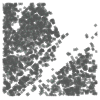

In [11]:
building_polygons

In [26]:
for p in polygonsList:
    print(p)

1
2
3
4
5
6
7
8
9
10


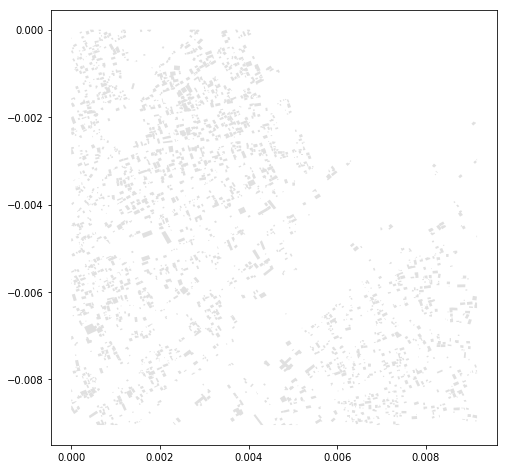

In [27]:
# plot using matplotlib
fig, ax = plt.subplots(figsize=(8, 8))
class_of_interest = [1]

# plotting, color by class type
for p in class_of_interest:
    for polygon in polygonsList[p]:
        mpl_poly = Polygon(np.array(polygon.exterior), color=plt.cm.Set1(p*10), lw=0, alpha=0.3)
        ax.add_patch(mpl_poly)

ax.relim()
ax.autoscale_view()

In [28]:
# Anzahl Features

for p in polygonsList:
    print("Type: {:4d}, objects: {}".format(p,len(polygonsList[p].geoms)))

Type:    1, objects: 2208
Type:    2, objects: 1581
Type:    3, objects: 1
Type:    4, objects: 13
Type:    5, objects: 823
Type:    6, objects: 3
Type:    7, objects: 0
Type:    8, objects: 4
Type:    9, objects: 11
Type:   10, objects: 129


In [29]:
annotations['polygons'] = annotations.apply(lambda row: wkt_loads(row.MultipolygonWKT),axis=1)
annotations['nPolygons'] = annotations.apply(lambda row: len(row['polygons'].geoms), axis = 1)

pvt = annotations.pivot(index='ImageId', columns='ClassType', values='nPolygons')
pvt

ClassType,1,2,3,4,5,6,7,8,9,10
ImageId,,,,,,,,,,
6010_1_2,0,44,0,12,1733,0,0,0,0,0
6010_4_2,0,0,0,6,2262,0,0,0,0,0
6010_4_4,0,0,0,0,3860,0,0,0,0,0
6040_1_0,0,0,0,5,2446,0,0,0,0,0
6040_1_3,0,0,0,1,3982,2,0,0,0,0
6040_2_2,0,0,0,2,3879,0,0,0,0,0
6040_4_4,0,0,0,7,1901,0,0,0,0,0
6060_2_3,62,173,0,7,1613,86,0,0,0,1
6070_2_3,109,81,2,0,41,0,24,3,0,13


In [30]:
from os import listdir
imagenames_13 = listdir('three_band') 

In [31]:
def _get_image_names(base_path, imageId):
    '''
    Get the names of the tiff files
    '''
    d = {'3': path.join(base_path,'three_band/{}.tif'.format(imageId)),             # (3, 3348, 3403)
         'A': path.join(base_path,'sixteen_band/{}_A.tif'.format(imageId)),         # (8, 134, 137)
         'M': path.join(base_path,'sixteen_band/{}_M.tif'.format(imageId)),         # (8, 837, 851)
         'P': path.join(base_path,'sixteen_band/{}_P.tif'.format(imageId)),         # (3348, 3403)
         }
    return d

In [32]:
def _convert_coordinates_to_raster(coords, img_size, xymax):
    Xmax,Ymax = xymax
    H,W = img_size
    W1 = 1.0*W*W/(W+1)
    H1 = 1.0*H*H/(H+1)
    xf = W1/Xmax
    yf = H1/Ymax
    coords[:,1] *= yf
    coords[:,0] *= xf
    coords_int = np.round(coords).astype(np.int32)
    return coords_int

In [33]:
def _get_xmax_ymin(grid_sizes_panda, imageId):
    xmax, ymin = grid_sizes_panda[grid_sizes_panda.ImageId == imageId].iloc[0,1:].astype(float)
    return (xmax,ymin)

In [34]:
def _get_polygon_list(wkt_list_pandas, imageId, cType):
    df_image = wkt_list_pandas[wkt_list_pandas.ImageId == imageId]
    multipoly_def = df_image[df_image.ClassType == cType].MultipolygonWKT
    polygonList = None
    if len(multipoly_def) > 0:
        assert len(multipoly_def) == 1
        polygonList = wkt_loads(multipoly_def.values[0])
    return polygonList

In [35]:
def _get_and_convert_contours(polygonList, raster_img_size, xymax):
    perim_list = []
    interior_list = []
    if polygonList is None:
        return None
    for k in range(len(polygonList)):
        poly = polygonList[k]
        perim = np.array(list(poly.exterior.coords))
        perim_c = _convert_coordinates_to_raster(perim, raster_img_size, xymax)
        perim_list.append(perim_c)
        for pi in poly.interiors:
            interior = np.array(list(pi.coords))
            interior_c = _convert_coordinates_to_raster(interior, raster_img_size, xymax)
            interior_list.append(interior_c)
    return perim_list,interior_list

In [36]:
def _plot_mask_from_contours(raster_img_size, contours, class_value = 1):
    img_mask = np.zeros(raster_img_size,np.uint8)
    if contours is None:
        return img_mask
    perim_list,interior_list = contours
    cv2.fillPoly(img_mask,perim_list,class_value)
    cv2.fillPoly(img_mask,interior_list,0)
    return img_mask


In [37]:
def generate_mask_for_image_and_class(raster_size, imageId, class_type, grid_sizes_panda,
                                     wkt_list_pandas):
    xymax = _get_xmax_ymin(grid_sizes_panda,imageId)
    polygon_list = _get_polygon_list(wkt_list_pandas,imageId,class_type)
    contours = _get_and_convert_contours(polygon_list,raster_size,xymax)
    mask = _plot_mask_from_contours(raster_size,contours,1)
    return mask

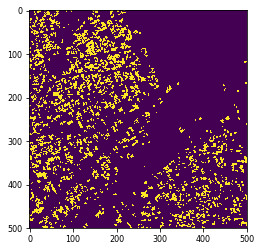

In [54]:
set_of_mask = dict()
mask_test = np.zeros((500,500))

for i in class_of_interest:
    
    mask = generate_mask_for_image_and_class((500,500),"6100_1_3",i,gs,annotations)
    set_of_mask[i] =  mask*255/9*i
    mask_test = mask_test + mask*255/9*i
    
cv2.imwrite("mask.png",mask_test)
img = mpimg.imread('mask.png')
plt.imshow(img)

(3, 3349, 3391)

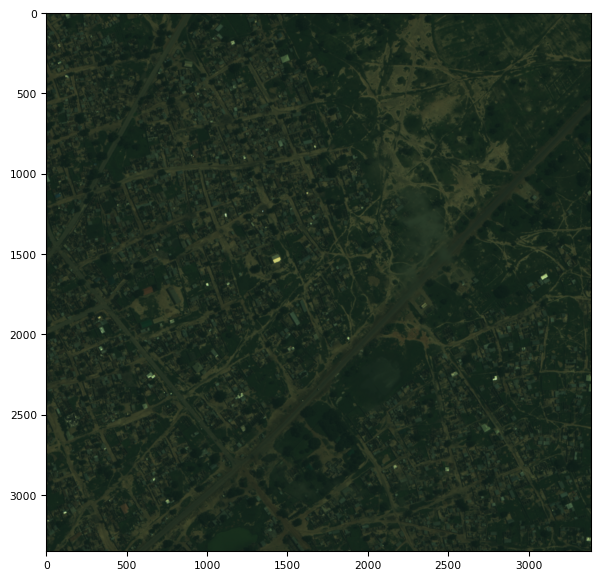

In [55]:
import tifffile as tiff

img_filename = 'three_band/6100_1_3.tif'

Image = tiff.imread(img_filename)

tiff.imshow(Image)
np.shape(Image)

In [41]:
#####################################################################
# The 3 next In's show how to scale polygons to image size and back #
#####################################################################
img_id = "6100_1_3"
i_grid_size = gs[gs.ImageId == img_id]
x_max = i_grid_size.Xmax.values[0]
y_min = i_grid_size.Ymin.values[0]

# Get just single class of trianing polyongs for this image
class_2 = annotations[(annotations.ImageId == img_id) & (annotations.ClassType == 2)]

# WKT to shapely object
polyg = wkt_loads(class_2.MultipolygonWKT.values[0])

print('Original Extent')
print(polyg.bounds)

Original Extent
(0.0, -0.0090421622198374, 0.009156, 0.0)


In [42]:
#Load the image and get its width and height

#image = gdal.Open('three_band/6120_2_2.tif')
#W = image.RasterXSize
#H = image.RasterYSize
#gdal is not loaded in kaggle yet, so I'll do these manually for now.

W = 3403
H = 3348

# Transform the polygons

W_ = W * (W / (W+1) )
H_ = H * (H / (H+1) )

x_scaler = W_ / x_max
y_scaler = H_ / y_min

polyg = affinity.scale(polyg, xfact = x_scaler, yfact = y_scaler, origin=(0,0,0))

print("New Extent to match raster")
print(polyg.bounds)

New Extent to match raster
(0.0, 0.0, 0.0, 0.0)


In [44]:
# Now scale the shapely file back to its original coordinates for submission 
# The scaler is the inverse of the original scaler
x_scaler = 1.0 / x_scaler
y_scaler = 1.0 / y_scaler

polyg = affinity.scale(polyg, xfact = x_scaler, yfact = y_scaler, origin=(0,0,0))
print("Back to original")
print(polyg.bounds)

Back to original
(0.0, 0.0, 0.0, 0.0)


(3, 3349, 3391)


(<matplotlib.figure.Figure at 0x117245f90>,
 <matplotlib.image.AxesImage at 0x11f790910>)

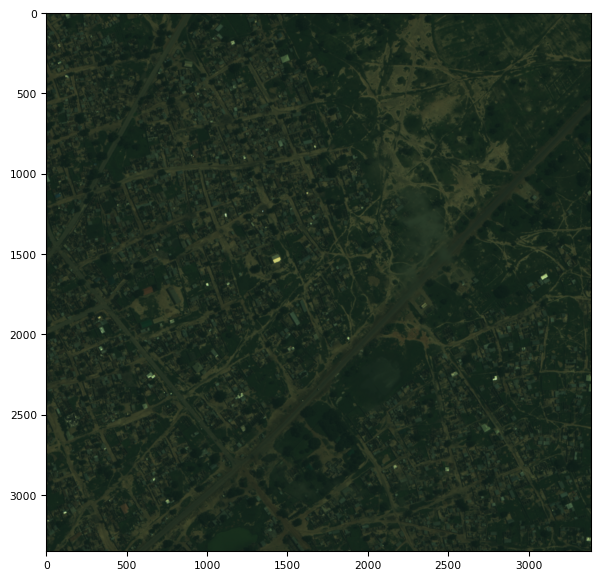

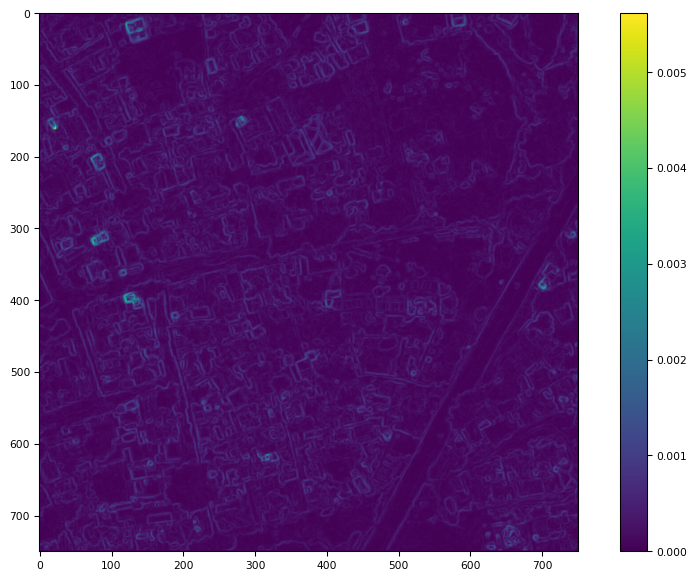

In [45]:
############################
# SOBEL EDGE DETECTION #
# from https://www.kaggle.com/bkamphaus/draper-satellite-image-chronology/exploratory-image-analysis #
############################


import skimage
from skimage.feature import greycomatrix, greycoprops
from skimage.filters import sobel, sobel_h, sobel_v

# load the image and convert it to grayscale
image = Image


dims = np.shape(image)
print(dims)

# a sobel filter is a basic way to get an edge magnitude/gradient image
tiff.imshow(image)
tiff.imshow(sobel(image[2,:750,:750]))
#tiff.imshow(sobel_h(image[2,:750,:750]), cmap='BuGn')    
#tiff.imshow(sobel_v(image[2,:750,:750]), cmap='BuGn')    

In [56]:
from sklearn.decomposition import PCA

pca = PCA(3)
pca.fit(image[0])
image_pca = pca.transform(image[0])
image_pca_img = image.to_matched_img(image_pca)

tiff.imshow(image_pca_img)

AttributeError: 'numpy.ndarray' object has no attribute 'to_matched_img'

(3349, 3391)

In [53]:
#############################
#
#############################

from skimage import color

hsv = color.rgb2hsv(image)

ValueError: the input array must be have a shape == (.., ..,[ ..,] 3)), got (3, 3349, 3391)